# Forecasting assignment- Q1

## 1. Forecast the Airlines Passengers data set

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import the required data sets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose #Splitting plots(Trend, Season)
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # Simple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Exponential smooting(Multi)

In [3]:
# Read the data
data = pd.read_excel('Airlines_Data.xlsx',index_col='Month',parse_dates=True)
data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
Passengers    96 non-null int64
dtypes: int64(1)
memory usage: 1.5 KB


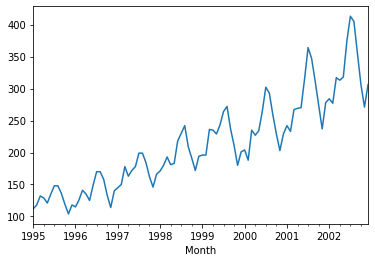

In [5]:
#Plot the data
data['Passengers'].plot()

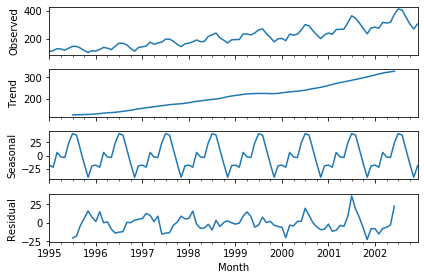

In [6]:
#Decompose the plots
data_dec = seasonal_decompose(data.Passengers,freq=12)
data_dec.plot()
plt.show()

In [7]:
#Splitting data
train = data.head(84)
test = data.tail(12)

### Evaluation Metric MAPE

In [8]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)  

### Simple Exponential Method

In [9]:
#smoothing_level
alpha= 0.15

In [10]:
SES_model = SimpleExpSmoothing(train.Passengers).fit(smoothing_level=alpha,optimized=False)
train['SES'] = SES_model.fittedvalues.shift(-1)
train.head()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


,Passengers,SES
Month,,
1995-01-01,112,112.000000
1995-02-01,118,112.900000
1995-03-01,132,115.765000
1995-04-01,129,117.750250
1995-05-01,121,118.237712


In [11]:
SES_pred= SES_model.predict(start = test.index[0],end = test.index[-1])
MAPE_SES= MAPE(SES_pred,test.Passengers) 
MAPE_SES

13.949033927060546

### Double Exponential Smoothing Method

In [12]:
#Trend additive method
DESadd_model = ExponentialSmoothing(train.Passengers, trend ='add').fit(smoothing_level=alpha)
train['DESadd'] = DESadd_model.fittedvalues.shift(-1)
train.head()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


,Passengers,SES,DESadd
Month,,,
1995-01-01,112,112.000000,117.293616
1995-02-01,118,112.900000,119.517450
1995-03-01,132,115.765000,123.507710
1995-04-01,129,117.750250,126.449430
1995-05-01,121,118.237712,127.749892


In [13]:
#Predictions
DESadd_pred = DESadd_model.predict(start= test.index[0], end= test.index[-1])
MAPE_DESadd= MAPE(DESadd_pred,test.Passengers)
MAPE_DESadd

10.675944366061932

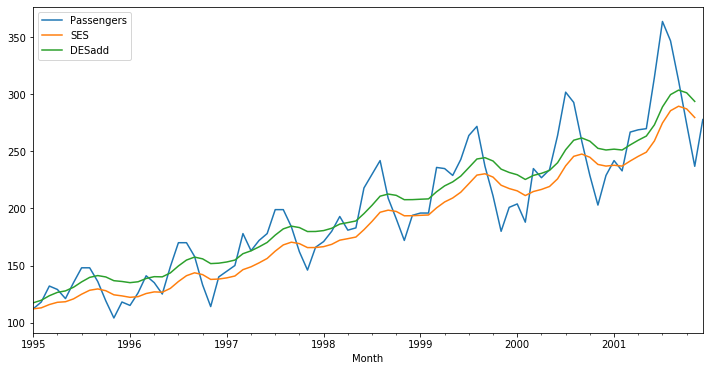

In [14]:
#Plotting the actual and predicted data
train[['Passengers','SES','DESadd']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

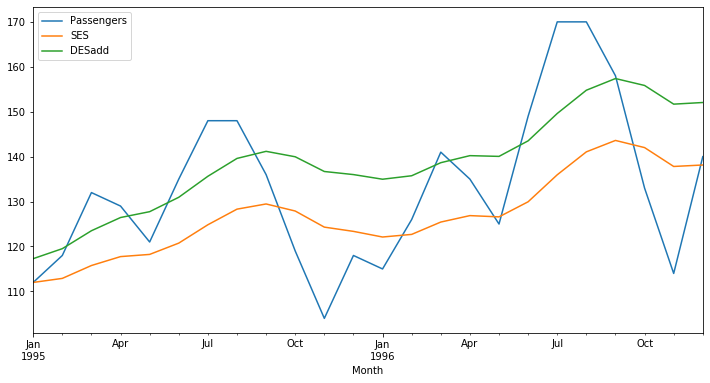

In [15]:
#Plotting part of the the actual and predicted data
train[['Passengers','SES','DESadd']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

In [16]:
#Trend multiplicative method
DESmul_model = ExponentialSmoothing(train.Passengers, trend ='mul').fit()
train['DESmul'] = DESmul_model.fittedvalues.shift(-1)
train.head()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


,Passengers,SES,DESadd,DESmul
Month,,,,
1995-01-01,112,112.000000,117.293616,112.430594
1995-02-01,118,112.900000,119.517450,118.453662
1995-03-01,132,115.765000,123.507710,132.507486
1995-04-01,129,117.750250,126.449430,129.495952
1995-05-01,121,118.237712,127.749892,121.465196


In [17]:
#Predictions
DESmul_pred = DESmul_model.predict(start = test.index[0], end = test.index[-1])
MAPE_DESmul= MAPE(DESmul_pred,test.Passengers)
MAPE_DESmul

12.939319250121676

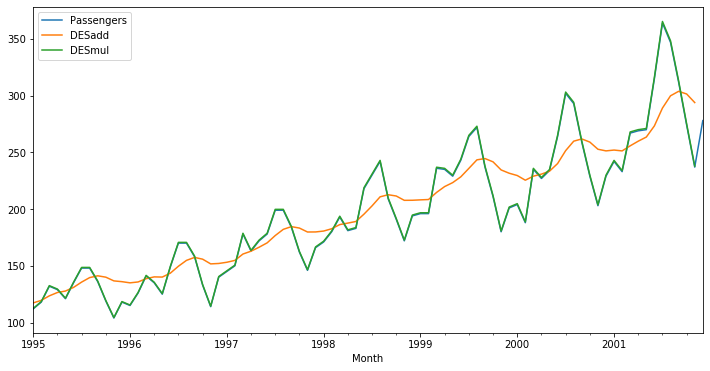

In [18]:
#Plotting the actual and predicted data
train[['Passengers','DESadd','DESmul']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

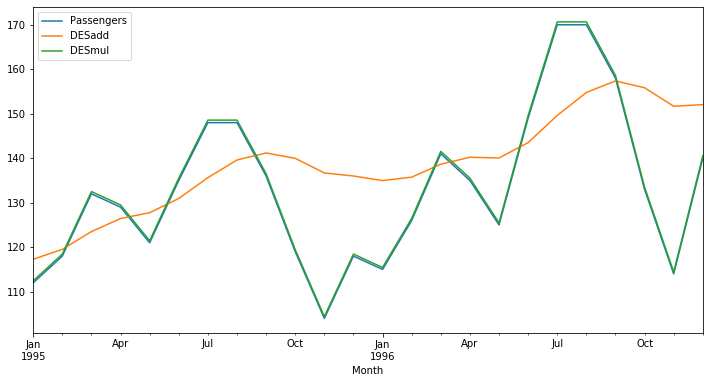

In [19]:
#Plotting part of the actual and predicted data
train[['Passengers','DESadd','DESmul']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

### Triple Exponential Smoothing

In [20]:
### Holts winter exponential smoothing with additive seasonality and additive trend
TESadd_model = ExponentialSmoothing(train.Passengers, trend= 'add', seasonal= 'add', seasonal_periods=12).fit()
train['TESadd'] = TESadd_model.fittedvalues.shift(-1)
train.head()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,Passengers,SES,DESadd,DESmul,TESadd
Month,,,,,
1995-01-01,112,112.000000,117.293616,112.430594,120.499999
1995-02-01,118,112.900000,119.517450,118.453662,135.437008
1995-03-01,132,115.765000,123.507710,132.507486,133.042590
1995-04-01,129,117.750250,126.449430,129.495952,125.516004
1995-05-01,121,118.237712,127.749892,121.465196,139.852153


In [21]:
#Predictions
TESadd_pred  = TESadd_model.predict(start= test.index[0],end = test.index[-1])
MAPE_TESadd= MAPE(TESadd_pred,test.Passengers)
MAPE_TESadd

1.617758228034002

In [22]:
### Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend
TESmul_model = ExponentialSmoothing(train.Passengers,trend='mul',seasonal='mul',seasonal_periods=12).fit()
train['TESmul'] = TESmul_model.fittedvalues.shift(-1)
train.head()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


,Passengers,SES,DESadd,DESmul,TESadd,TESmul
Month,,,,,,
1995-01-01,112,112.000000,117.293616,112.430594,120.499999,111.949145
1995-02-01,118,112.900000,119.517450,118.453662,135.437008,134.897228
1995-03-01,132,115.765000,123.507710,132.507486,133.042590,129.465363
1995-04-01,129,117.750250,126.449430,129.495952,125.516004,129.158014
1995-05-01,121,118.237712,127.749892,121.465196,139.852153,139.519172


In [23]:
#Predictions
TESmul_pred  = TESmul_model.predict(start= test.index[0],end = test.index[-1])
MAPE_TESmul= MAPE(TESmul_pred,test.Passengers)
MAPE_TESmul

1.9395255950348502

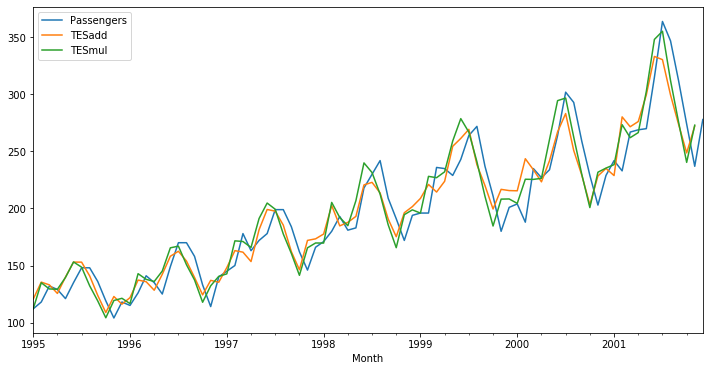

In [24]:
#Plotting the actual and predicted data
train[['Passengers','TESadd','TESmul']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

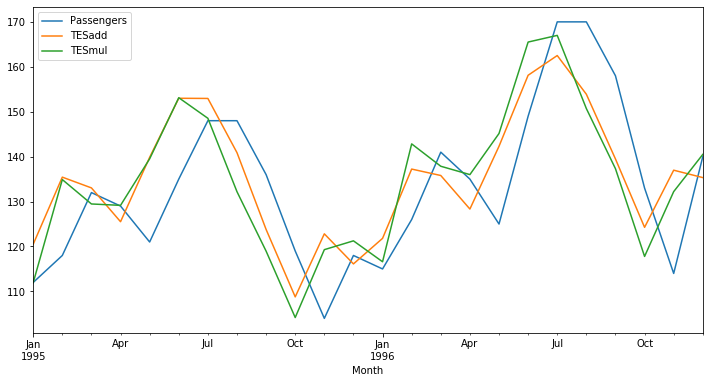

In [25]:
#Plotting part of the actual and predicted data
train[['Passengers','TESadd','TESmul']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

In [26]:
### Holts winter exponential smoothing with additive seasonality and multiplicative trend
TESmuladd_model = ExponentialSmoothing(train.Passengers,trend='mul',seasonal='add',seasonal_periods=12).fit()
train['TESmuladd'] = TESmuladd_model.fittedvalues.shift(-1)
train.head()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


,Passengers,SES,DESadd,DESmul,TESadd,TESmul,TESmuladd
Month,,,,,,,
1995-01-01,112,112.000000,117.293616,112.430594,120.499999,111.949145,119.998879
1995-02-01,118,112.900000,119.517450,118.453662,135.437008,134.897228,134.693592
1995-03-01,132,115.765000,123.507710,132.507486,133.042590,129.465363,132.214450
1995-04-01,129,117.750250,126.449430,129.495952,125.516004,129.158014,124.597158
1995-05-01,121,118.237712,127.749892,121.465196,139.852153,139.519172,138.864053


In [27]:
#Predictions
TESmuladd_pred  = TESmuladd_model.predict(start= test.index[0],end = test.index[-1])
MAPE_TESmuladd= MAPE(TESmuladd_pred,test.Passengers)
MAPE_TESmuladd

1.9026311194708478

In [28]:
### Holts winter exponential smoothing with multiplicative seasonality and additive trend
TESaddmul_model = ExponentialSmoothing(train.Passengers,trend='add',seasonal='mul',seasonal_periods=12).fit()
train['TESaddmul'] = TESaddmul_model.fittedvalues.shift(-1)
train.head()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


,Passengers,SES,DESadd,DESmul,TESadd,TESmul,TESmuladd,TESaddmul
Month,,,,,,,,
1995-01-01,112,112.000000,117.293616,112.430594,120.499999,111.949145,119.998879,112.379009
1995-02-01,118,112.900000,119.517450,118.453662,135.437008,134.897228,134.693592,136.033125
1995-03-01,132,115.765000,123.507710,132.507486,133.042590,129.465363,132.214450,130.315038
1995-04-01,129,117.750250,126.449430,129.495952,125.516004,129.158014,124.597158,130.048559
1995-05-01,121,118.237712,127.749892,121.465196,139.852153,139.519172,138.864053,140.243775


In [29]:
#Predictions
TESaddmul_pred  = TESaddmul_model.predict(start= test.index[0],end = test.index[-1])
MAPE_TESaddmul= MAPE(TESaddmul_pred,test.Passengers)
MAPE_TESaddmul

2.821077491871009

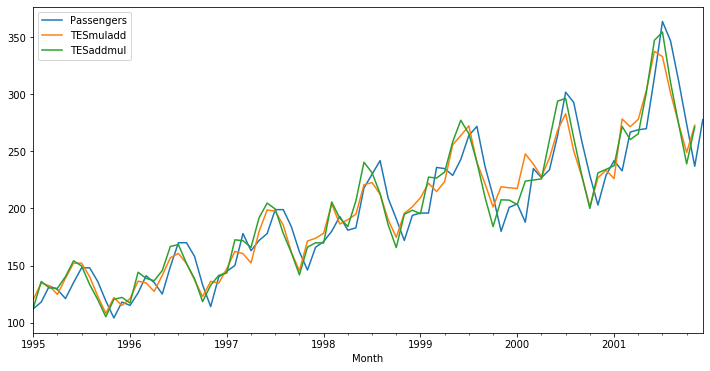

In [30]:
#Plotting the actual and predicted data
train[['Passengers','TESmuladd','TESaddmul']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

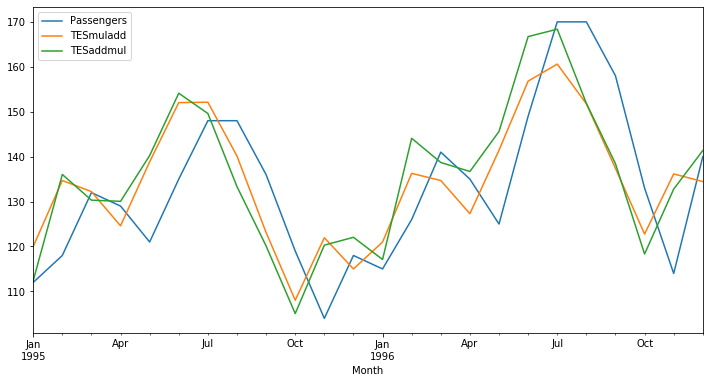

In [31]:
#Plotting part of the actual and predicted data
train[['Passengers','TESmuladd','TESaddmul']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

In [32]:
#Summary of the MAPE values
values = [['MAPE_SES',MAPE_SES],
        ['MAPE_DESadd',MAPE_DESadd],['MAPE_DESmul',MAPE_DESmul],
        ['MAPE_TESadd',MAPE_TESadd],['MAPE_TESmul',MAPE_TESmul],
        ['MAPE_TESaddmul',MAPE_TESaddmul],['MAPE_TESmuladd',MAPE_TESmuladd]]
 
# Create the pandas DataFrame
MAPE_table = pd.DataFrame(values, columns = ['Model', 'MAPE_value']).sort_values(by= 'MAPE_value')
MAPE_table

,Model,MAPE_value
3,MAPE_TESadd,1.617758
6,MAPE_TESmuladd,1.902631
4,MAPE_TESmul,1.939526
5,MAPE_TESaddmul,2.821077
1,MAPE_DESadd,10.675944
2,MAPE_DESmul,12.939319
0,MAPE_SES,13.949034


#### Least MAPE obtained by Holts winter exponential smoothing with additive seasonality and additive trend, So use it as a final model

### Final Model

In [33]:
# Final model by combining train and test
final_model = ExponentialSmoothing(data.Passengers,trend='add',seasonal='add',seasonal_periods=12).fit()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [34]:
#Forecasting for next 12 time periods
final_model.forecast(12)

2003-01-01    320.924021
2003-02-01    313.638039
2003-03-01    352.925020
2003-04-01    350.350301
2003-05-01    356.060923
2003-06-01    408.899129
2003-07-01    446.143114
2003-08-01    433.358026
2003-09-01    382.762460
2003-10-01    336.170254
2003-11-01    303.315050
2003-12-01    349.662471
Freq: MS, dtype: float64